<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/EDA%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 막대 그래프와 히스토그램

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# 1. 막대그래프
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

# 도수분포표 작성
wine_type = wine['Class'].value_counts()
wine_type

class_1    71
class_0    59
class_2    48
Name: Class, dtype: int64

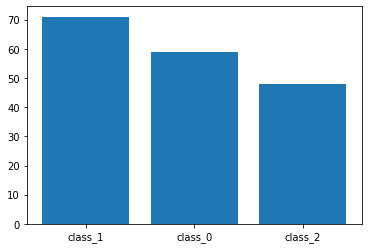

In [3]:
# 막대그래프 그리기
plt.bar(wine_type.index, wine_type.values, width = 0.8, bottom = None,
        align='center')
plt.show()

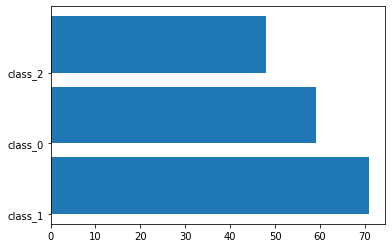

In [4]:
# 수평 막대그래프 그리기
plt.barh(wine_type.index, wine_type.values, height = 0.8, left = None, 
         align='edge')
plt.show()

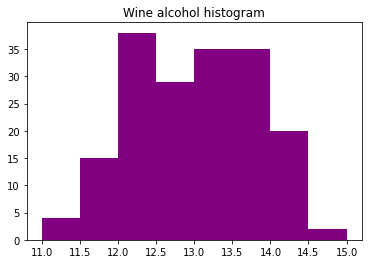

In [6]:
# 2. 히스토그램
plt.title('Wine alcohol histogram')
plt.hist('alcohol', bins=8, range = (11,15), color = 'purple', data = wine)
plt.show()

### 상자그림

In [ ]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 상자그림 그리기
plt.boxplot(iris.drop(columns = 'class'))
plt.show()

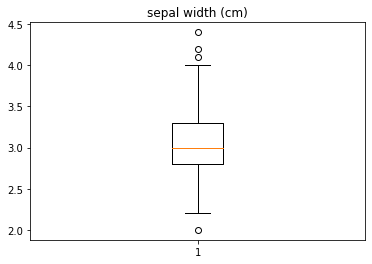

In [26]:
# 하나의 컬럼만 상자그림으로 표현(sepal width (cm))
plt.boxplot(iris['sepal width (cm)'], whis = 1.5)    # whis : 수염의 길이를 구하기 위해 IQR에 곱할 수 지정
plt.title('sepal width (cm)')
plt.show()

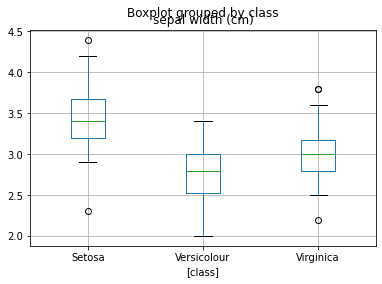

In [27]:
# 카테고리 변수에 따라 분리하여 상자그림 그리기
iris[['sepal width (cm)', 'class']].boxplot(by = 'class')
plt.show()

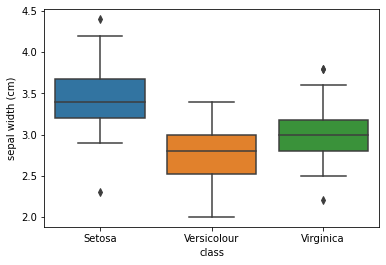

In [28]:
# 상자그림에 색상 입히기
import seaborn as sns
sns.boxplot(x = 'class', y = 'sepal width (cm)', data = iris)
plt.show()

### 산점도

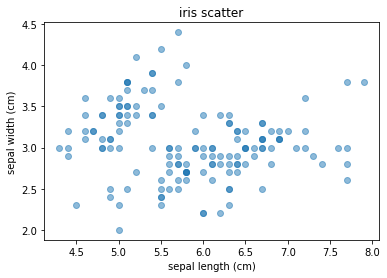

In [29]:
# 데이터 가져오기
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = load_iris().target
iris['class'] = iris['class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 산점도 그리기
plt.title('iris scatter')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(x = iris['sepal length (cm)'], y = iris['sepal width (cm)'], alpha = 0.5)
plt.show()

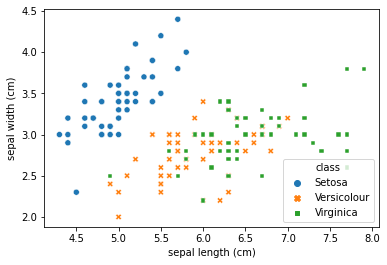

In [30]:
# 색 분리하여 표시하기
import seaborn as sns
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris, 
                hue = 'class', style = 'class')
plt.show()